# ECE 311 Lab Final:

## Due Date: Sunday, 12/15 @ 11:59PM
### Note: a 10% penalty will be applied for each hour your submission is late!

This lab final will review the import concepts from the course. Much of this lab should be familiar from previous labs. We encourage you to look back on your previous labs or look at the posted lab solutions on the course website to remind you how to produce your results and evaluate their correctness. Enough talking, let's get started!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

from skimage.io import imread
from scipy import signal
from pz_plot import pz_plot
from scipy.io import wavfile
from numpy.random import randn
from IPython.display import Audio

%matplotlib inline

## Exercise 1: Building an Edge Detector 2.0

In Lab 2 Exercise 4, we built a simple edge detector by applying a high-pass filter along the rows and columns of an image, then combined the two results to create an image of detected edges. In this exercise, we will build a more sophisticated edge detector by adding onto our original design. This improved detector is known as the [Sobel operator](https://en.wikipedia.org/wiki/Sobel_operator).

The Sobel operator uses the same intuition of finding horizontal and vertical edges separately, then combining these results to form the image. Let $G_x$ be our resulting image from detecting vertical edges (through the x-axis) and $G_y$ be our resulting image from detecting horizontal edges (through the y-axis, then our final result will be given by

$$
G[i,j] = \sqrt{G^2_x[i,j]+G^2_y[i,j]},
$$

where $G[i,j]$ is the pixel value at row $i$, column $j$. We compute $G_x$ and $G_y$ via convolution as follows:

$$
G_x = I * \begin{bmatrix}
1 & 0 & -1\\
\end{bmatrix} * \begin{bmatrix}
1\\
2\\
1\\
\end{bmatrix}
$$

$$
G_y = I * \begin{bmatrix}
1\\
0\\
-1\\
\end{bmatrix} * \begin{bmatrix}
1 & 2 & 1\\
\end{bmatrix},
$$

where $I$ is our original image and $*$ denotes the convolution operator. Note that in the computation of $G_x$ we convolve along the rows with a high-pass filter and convolve along the columns with a low-pass filter, while the computation of $G_y$ reverses this relationship with the same filters.

a. Compute the image $G_x$ by performing the two convolutions along the rows and columns, respectively, using $\textrm{signal.convolve()}$. Plot your resulting image in grayscale. Remember that you should apply the high-pass filter $\begin{bmatrix}1 & 0 & -1\end{bmatrix}$ to each **row** and the low-pass filter $\begin{bmatrix}1 & 2 & 1\end{bmatrix}$ to each **column**. Also, be sure to use the "same" mode when using $\textrm{signal.convolve()}$.

b. Compute the image $G_y$ by performing the two convolutions along the rows and columns, respectively, using $\textrm{signal.convolve()}$. Plot your resulting image in grayscale. Remember that you should apply the high-pass filter $\begin{bmatrix}1 & 0 & -1\end{bmatrix}$ to each **column** and the low-pass filter $\begin{bmatrix}1 & 2 & 1\end{bmatrix}$ to each **row**.

c. Create final result image $G$ according to the above formulation. Plot your resulting image in grayscale.

Text(0.5,1,'The detected image')

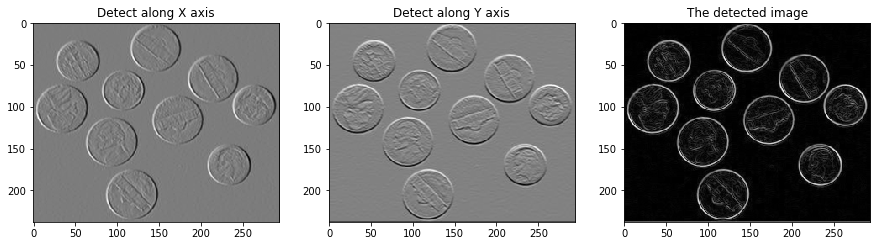

In [2]:
#load coins.jpg
coins = imread('coins.jpg')
n_rows,n_cols = coins.shape

#Code for part a.
X_coe = np.array([[1, 0, -1],
                         [2, 0, -2],
                         [1, 0, -1]])

Gx = signal.convolve2d(coins, X_coe, 'same')
plt.figure(figsize = (15, 6))
plt.subplot(131)
plt.imshow(Gx, 'gray')
plt.title("Detect along X axis")

#Code for part b:
Y_coe = np.array([[1, 2, 1],
                          [0, 0, 0],
                          [-1, -2, -1]])

Gy = signal.convolve2d(coins, Y_coe, 'same')
plt.subplot(132)
plt.imshow(Gy, 'gray')
plt.title("Detect along Y axis")

#Code for part c:
result = np.zeros(coins.shape)
for i in range (0, result.shape[0]):
    for j in range (0, result.shape[1]):
        result[i, j] = np.sqrt(Gx[i, j] **2 + Gy[i, j]**2)
plt.subplot(133)
plt.imshow(result, 'gray')
plt.title("The detected image")

## Exercise 2: LCCDE, Transfer Function, and Impulse Response

For each of the following Linear Constant Coefficient Difference Equations (LCCDE), determine the transfer function (numerator and denominator coefficients) in order to plot both the pole-zero plot and impulse response of the system for the requested number of points. **Please plot your impulse responses as a stem plot!** For each system, indicate whether it is BIBO stable, marginally stable, or not BIBO stable and briefly explain your choice.

Note: We have provided the $\textrm{pz_plot}()$ function from Lab 3 to create your pole-zero plots. Refer to Lab 3 for usage of this function. Some other functions of interest you may want to use from Lab 3 will be $\textrm{signal.dimpulse()}$ and $\textrm{signal.tf2zpk()}$.

a. $y_1[n] = \frac{1}{2}x[n]-\frac{1}{4}x[n-1]+x[n-2]-
\frac{1}{4}x[n-3]+\frac{1}{2}x[n-4],\quad 0\leq n < 8$

b. $y_2[n] = x[n] + \frac{1}{4}x[n-2] + 3y_2[n-1] - 2y_2[n-2],\quad 0\leq n < 20$

c. $y_3[n] = x[n] - \frac{1}{4}x[n-2] - y_3[n-3], \quad 0\leq n < 20$

Poles: [0. 0. 0. 0.]
Zeros: [ 2.50000000e-01+0.96824584j  2.50000000e-01-0.96824584j
 -3.88578059e-16+1.j         -3.88578059e-16-1.j        ]
Poles: [2. 1.]
Zeros: [-0.+0.5j  0.-0.5j]
Poles: [-1. +0.j         0.5+0.8660254j  0.5-0.8660254j]
Zeros: [ 0.5 -0.5  0. ]


Text(0.5,1,'Impulse Response of Example System 3')

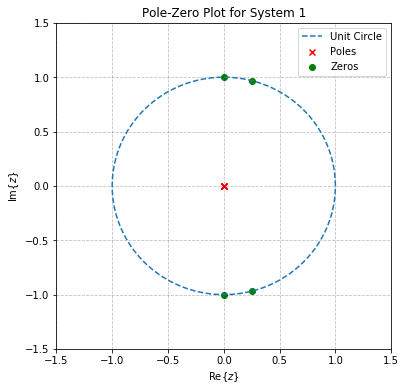

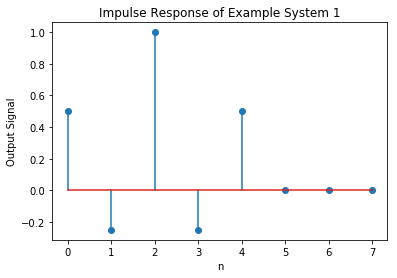

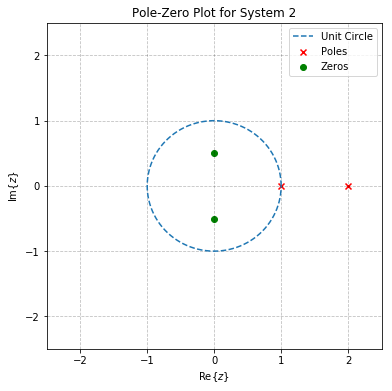

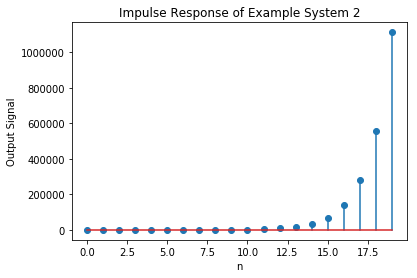

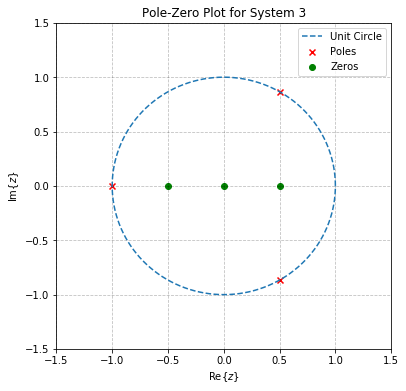

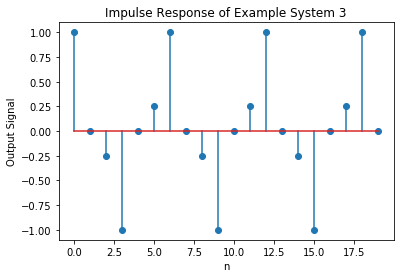

In [3]:
#Code for exercise 2:
b1 = [1, -1/2, 2, -1/2, 1]
a1 = [2, 0, 0, 0, 0]
z1, p1, _ = signal.tf2zpk(b1, a1)
print('Poles:',p1)
print('Zeros:',z1)

pz_plot(z1,p1,'Pole-Zero Plot for System 1')

n1,y1 = signal.dimpulse((b1, a1, 1),n=8)
h_n1 = y1[0]
plt.figure()
plt.stem(n1, h_n1) #
plt.xlabel('n')
plt.ylabel('Output Signal')
plt.title('Impulse Response of Example System 1')


b2 = [1, 0, 1/4]
a2 = [1, -3, 2]
z2, p2, _ = signal.tf2zpk(b2, a2)
print('Poles:',p2)
print('Zeros:',z2)

pz_plot(z2,p2,'Pole-Zero Plot for System 2')

n2,y2 = signal.dimpulse((b2, a2, 1),n=20)
h_n2 = y2[0]
plt.figure()
plt.stem(n2, h_n2) #
plt.xlabel('n')
plt.ylabel('Output Signal')
plt.title('Impulse Response of Example System 2')


b3 = [1, 0, -1/4, 0]
a3 = [1, 0, 0, 1]
z3, p3, _ = signal.tf2zpk(b3, a3)
print('Poles:',p3)
print('Zeros:',z3)

pz_plot(z3,p3,'Pole-Zero Plot for System 3')

n3,y3 = signal.dimpulse((b3, a3, 1),n=20)
h_n3 = y3[0]
plt.figure()
plt.stem(n3, h_n3) #
plt.xlabel('n')
plt.ylabel('Output Signal')
plt.title('Impulse Response of Example System 3')

Comments for 2.a:
This system is stable because all its poles are inside the unit circle.

Comments for 2.b:
This system is not stable because there are poles outside the unit circle.

Comments for 2.c:
This system is marginly stable because all its poles are exactly on the unit circle.


## Exercise 3: Windows and Spectral Resolution

a. Plot the magnitude spectrum (not dB scale) of the following signal using $\textrm{np.fft.rfft()}$.

$$
x_1[n] = 0.5\sin\left(0.5\pi n\right) + 0.05\sin\left(0.57\pi n\right), \quad 0\leq n < 80
$$

What is happening to the second sinusoid with the smaller magnitude in the frequency domain? Would it be easy to algorithmically locate this frequency peak?

b. Fill in the function $\textrm{modify()}$ below which applies a Hamming window to an input signal. Apply this function to $x_1[n]$ and plot the resulting magnitude spectrum. Is it easier to locate the smaller frequency now?

c. Now let's try resolving two close, but equally large frequency peaks in the below signal $x_2[n]$.

$$
x_2[n] = 0.5\sin\left(0.5\pi n\right) + 0.5\sin\left(0.518\pi n\right), \quad 0\leq n < 80
$$

Plot the magnitude spectrum of $x_2[n]$ (not dB scale) before and after applying the $\textrm{modify()}$ function. Is it easier to differentiate between the two peaks after applying the Hamming window? Why or why not? **Hint: think about the tradeoff between rectangular and Hamming windows!**


/anaconda3/lib/python3.7/site-packages/mkl_fft/_numpy_fft.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfft_numpy(a, n=n, axis=axis)


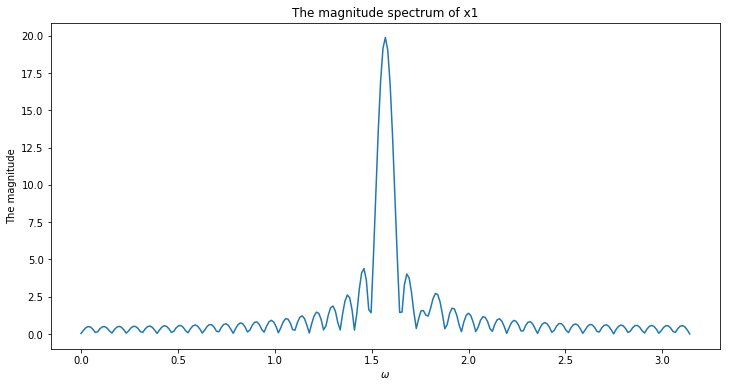

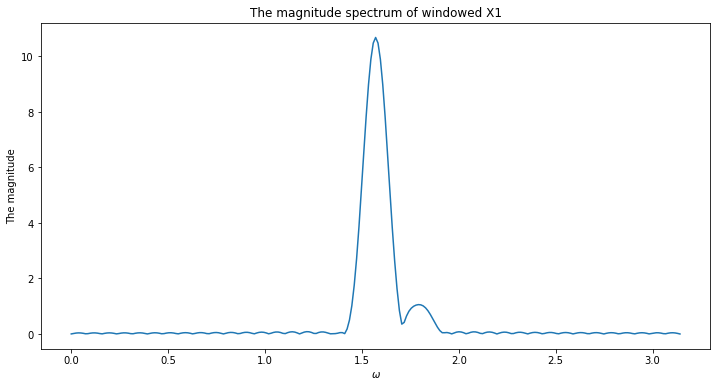

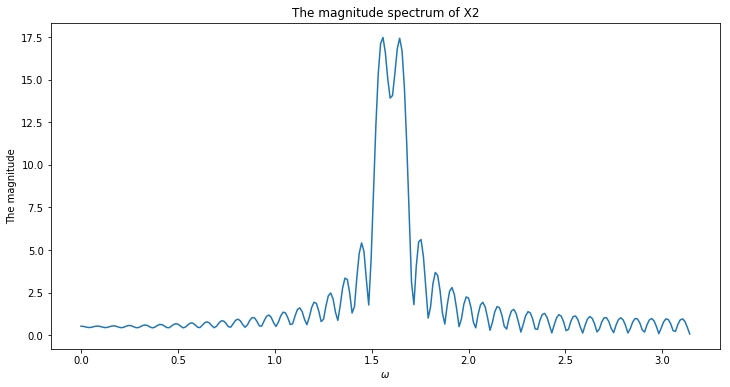

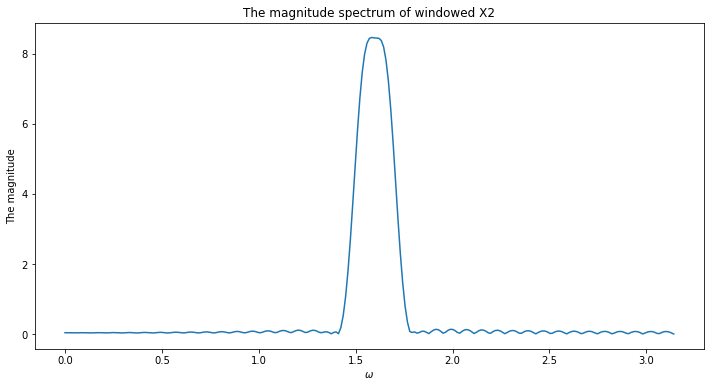

In [4]:
#Code for part 3.a:
n = np.arange(80)
x1 = 0.5 * np.sin(0.5 * np.pi * n) + 0.05 * np.sin(0.57 * np.pi * n)
x1_fft = np.fft.rfft(x1, 512)

omega_real = np.linspace(0,np.pi,len(x1_fft))
plt.figure(figsize = (12, 6))
plt.title('The magnitude spectrum of x1')
plt.xlabel('$\omega$')
plt.ylabel('The magnitude')
plt.plot(omega_real,np.absolute(x1_fft))

#Code for part 3.b:
def modify(x):
    #apply a hamming window to the signal
    modified = x * signal.windows.hamming(80)
    return modified
x_window = modify(x1)
x_window_fft = np.fft.rfft(x_window, 512)

omega2_real = np.linspace(0,np.pi,len(x_window_fft))
plt.figure(figsize = (12, 6))
plt.title('The magnitude spectrum of windowed X1')
plt.xlabel('$\omega$')
plt.ylabel('The magnitude')
plt.plot(omega2_real,np.absolute(x_window_fft))

#Code for part 3.c:
x2 = 0.5 * np.sin(0.5 * np.pi * n) + 0.5 * np.sin(0.518 * np.pi * n)
x2_fft = np.fft.rfft(x2, 512)

omega3_real = np.linspace(0,np.pi,len(x2_fft))
plt.figure(figsize = (12, 6))
plt.title('The magnitude spectrum of X2')
plt.xlabel('$\omega$')
plt.ylabel('The magnitude')
plt.plot(omega3_real,np.absolute(x2_fft))

x2_window = modify(x2)
x2_window_fft = np.fft.rfft(x2_window, 512)

omega4_real = np.linspace(0,np.pi,len(x2_window_fft))
plt.figure(figsize = (12, 6))
plt.title('The magnitude spectrum of windowed X2')
plt.xlabel('$\omega$')
plt.ylabel('The magnitude')
plt.plot(omega4_real,np.absolute(x2_window_fft))


Comments for part 3.a:
The second sin with the smaller magnitude becomes unremarkable on the spectrum picture. It is hard for us to algorithmically locate this frequency peak because we may take it as a part of the sin function with the larger magnitude.

Comments for part 3.b:
Yes. After applying the hamming window to the original function, we can easily notice that there is a lower peak beside the peak around omega = pi/2. The small signal becomes more notable on the spectrum.

Comments for part 3.c:
No. In this case, the two peaks appear as one peak after applying the hamming window to the original signal because the hamming window is wider than rectangular window, and it will make the adjacent two peaks with near magnitude and frequency look like one single peak.


## Exercise 4: Chirp Redux

For this exercise, we will revisit the chirp activity from Lab 4 but this time with the help of spectrograms to visualize our chirps. The below provided code creates a five second long chirp signal with sampling rate $f_s = 44,100~Hz$ and maximum signal frequency $22,050~Hz$. Recall that the $\textrm{signal.chirp}$ function linearly sweeps between the requested frequencies over the set time interval. Hint: referring back to Labs 4 and 5 will help with understanding the chirp function and plotting spectrograms, respectively.

a. Plot the spectrogram of the original chirp signal we have generated for you.

b. Reduce the sampling rate of the original chirp signal by a factor of 5. Plot the resulting spectrogram and explain what you see. If we listened to this audio signal, how many rises and falls would you hear? **Note: you may either create a new chirp signal using the requested lower sampling or perform downsampling without an anti-aliasing filter.**

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


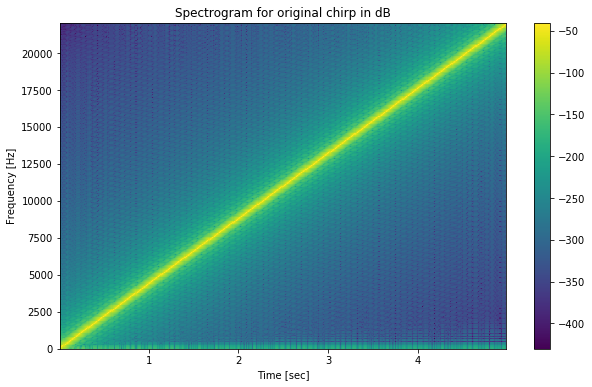

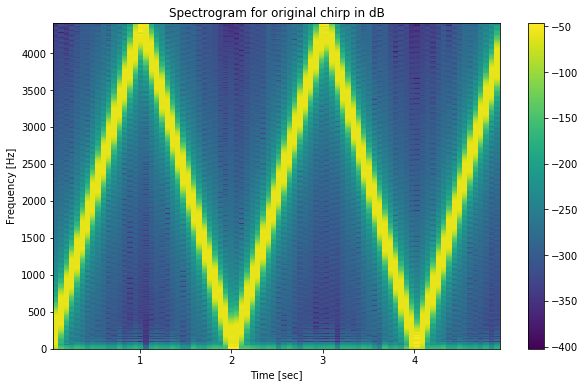

In [5]:
Fs = 44100 #sampling rate for audio clip in Hz
t1 = 5 #make clips 5 seconds
t = np.linspace(0,t1,t1*Fs)
f0 = 0 #start frequency (Hz)
f1 = 22050 #end frequency (Hz)
chirp_original = signal.chirp(t,f0 = f0, t1 = t1, f1 = f1)
nfft = 1024

#Code for part 4.a:
f, t, S = signal.spectrogram(chirp_original, Fs, nperseg = nfft, noverlap = int(nfft/2), nfft = nfft)

plt.figure(figsize=(10,6))
plt.pcolormesh(t, f, 20 * np.log10(S))
plt.title('Spectrogram for original chirp in dB')
plt.ylim([0, 22050])
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar()

#Code for part 4.b:
F_new = Fs / 5
t_new = np.linspace(0, t1, t1 * F_new)
chirp_new = signal.chirp(t_new, f0 = f0, t1 = t1, f1 = f1)
f1, t_new, S1 = signal.spectrogram(chirp_new, F_new, nperseg = nfft, noverlap = int(nfft/2), nfft = nfft)

plt.figure(figsize=(10,6))
plt.pcolormesh(t_new, f1, 20 * np.log10(S1))
plt.title('Spectrogram for original chirp in dB')
plt.ylim([0, 4410])
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar()


Comments for 4.b:
Since the new sampling frequency is only 1/5 of the Nyquist rate, aliscing must accur. So we will hear 3 ups and 2 downs.


## Exercise 5: FIR Filter Design

a. Given the audio signal file ``Sound_original.wav``, compute and display the full FFT magnitude spectrum (no dB scale). Try listening to it!

b. Now let's assume that we pass this audio signal into a system described as followed.

<img src="./sys_illus.png" alt="Drawing" style="width: 600px;"/>

where $x[n]$ is our audio signal, $H(\omega)$ is an LTI system with impulse response $h[n]$, $d[n]$ is some noise, and $y[n]$ is the ouput. 
For this question, we want to simulate the ouput result $y[n]$.

We only know that the LTI system $H(\omega)$ is acting like a low-pass filter with a cutoff frequency of $\frac{\pi}{3}$. Use $\textrm{signal.remez()}$ to obtain the impulse response of this system assuming the filter length is $N = 100$ and the transition bandwidth is $\frac{\pi}{10}$. Plot magnitude response **on a dB scale** using the provided $\textrm{sig2db()}$ function. 

c. Now, we can obtain output $y[n]$ by filtering $x[n]$ with $h[n]$ and adding $d[n]$ after filtering. 

Here, $d[n]$ is assumed to be additive white Gaussian noise (AWGN). We can create our noise $d[n]$ by typing

``d = 1000 * np.random.randn(len(x_filtered))``

Compute $y[n]$ by summing your filtered audio signal $x[n]*h[n]$ and d. Try listening to y! Plot the FFT magnitude spectrum of $d[n]$ and the FFT magnitude spectrum of $y[n]$ on separate figures (no dB scale). Judging from these two graphs, do you think the simple filtering methods we have discussed in class will be able to perfectly separate our noise $d[n]$ from the filtered audio $x[n]*h[n]$?

/anaconda3/lib/python3.7/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)
/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]


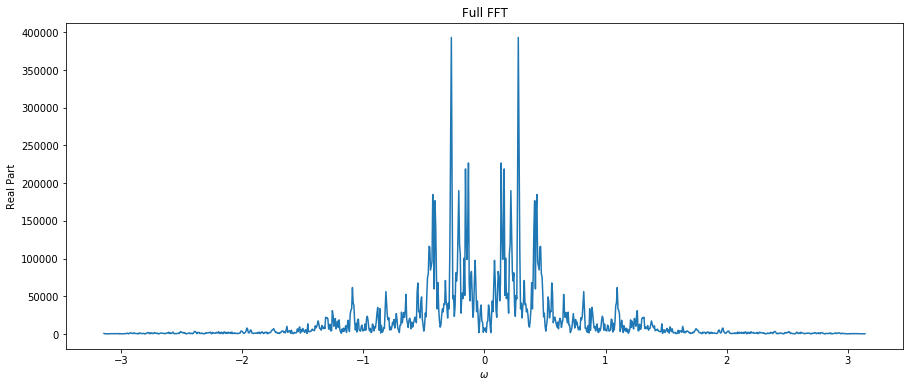

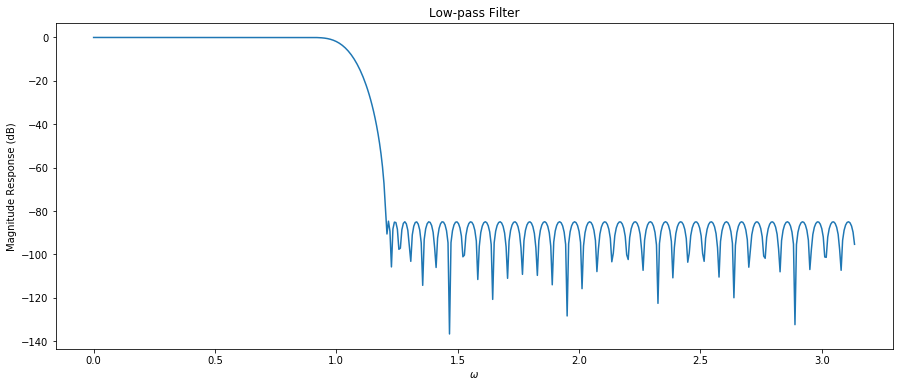

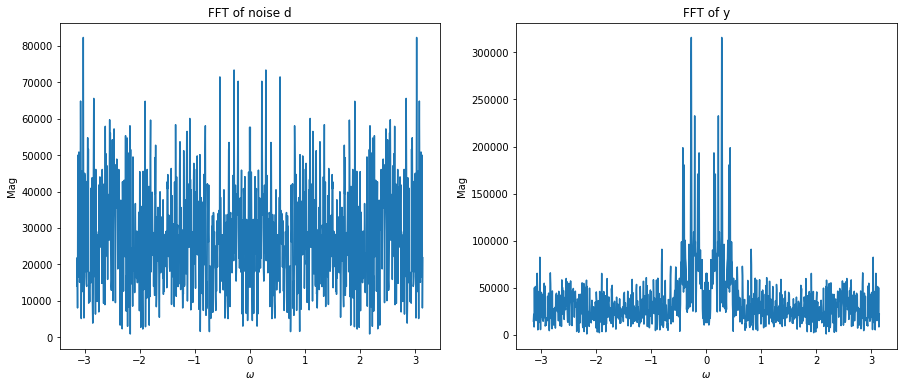

In [10]:
#Utility function for dB scaling of magnitude spectra
def sig2db(mag_spec):
    return 20*np.log10(mag_spec)
fs,original = wavfile.read('Sound_original.wav')

#Code for 5.a:
full_fft = np.fft.fft(original, 1024)
centred_fft = np.fft.fftshift(full_fft)
omega_full = np.linspace(-np.pi,np.pi,len(centred_fft)) #new frequency axis

plt.figure(figsize=(15,6))
plt.title('Full FFT')
plt.xlabel('$\omega$')
plt.ylabel('Real Part')
plt.plot(omega_full,np.absolute(centred_fft))

#Code for 5.b:
N = 100
a = [1,0]
#Low-pass Filter
lpf_bands = [0,1/3 - 0.05, 1/3 + 0.05, 1]
lpf_desired = [1,0] #gain of one for passband, gain of zero for stopband
lpf = signal.remez(N,lpf_bands,lpf_desired,fs=2)
w,H_lpf = signal.freqz(lpf,a)

plt.figure(figsize=(15,6))
plt.title('Low-pass Filter')
plt.plot(w,sig2db(abs(H_lpf)))
plt.xlabel('$\omega$')
plt.ylabel('Magnitude Response (dB)')

#Code for 5.c:
x_filtered = signal.lfilter(lpf, 1, original)
d = 1000 * np.random.randn(len(x_filtered))
y = x_filtered + d

d_fft = np.fft.fft(d, 1024)
centred_d = np.fft.fftshift(d_fft)
omega_d = np.linspace(-np.pi,np.pi,len(centred_d)) 

y_fft = np.fft.fft(y, 1024)
centred_y = np.fft.fftshift(y_fft)
omega_y = np.linspace(-np.pi, np.pi, len(centred_y))

plt.figure(figsize=(15,6))
plt.subplot(121)
plt.title('FFT of noise d')
plt.xlabel('$\omega$')
plt.ylabel('Mag')
plt.plot(omega_d,np.absolute(centred_d))

plt.subplot(122)
plt.title('FFT of y')
plt.xlabel('$\omega$')
plt.ylabel('Mag')
plt.plot(omega_y, np.absolute(centred_y))

Audio(y, rate = fs)

Comments for 5.c:
No. The Gaussian noise is neither high-frequency nor low-frequency noise, so we are not able to eliminate it simply using high-pass or low-pass filter, otherwise we will also lose the data of our signal.


## Exercise 6: Multi-rate Sampling

Given the audio signal file ``Sound_original.wav`` with $f_s = 16,000~Hz$, we want to try some upsampling and downsampling:

a. Plot the full FFT magnitude spectrum of the audio data..

b. Upsample the audio signal from part (a) by a factor of three. Remember you need to low-pass filter the signal with an appropriate filter before or after the upsampling, you have to decide which is correct! We have provided a filled-in version of the low-pass filtering function from Lab 7. You need to decide what constant to pass to the function and whether the filter should be used before or after upsampling. We would like the following two plots:

* Full FFT magnitude spectrum (not dB scale) after the signal is upsampled by a factor of three. Don't forget to use fftshift!

* Full FFT magnitude spectrum (not dB scale) after the filter is applied to the signal.

c. Downsample the original audio signal **from part (a)** by a factor of two. Again, remember you need to low-pass filter the signal with an appropriate filter before or after the downsampling, you have to decide which is correct! We would like the following two plots:

* Full FFT magnitude spectrum (not dB scale) after the filter is applied to the signal.

* Full FFT magnitude spectrum (not dB scale) after the signal is downsampled.

/anaconda3/lib/python3.7/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)
/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]


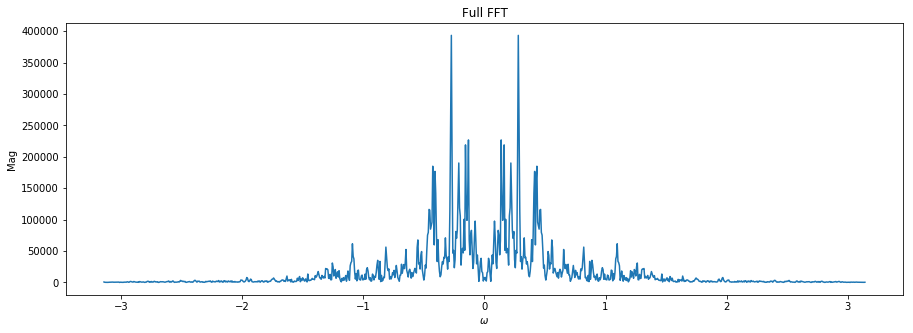

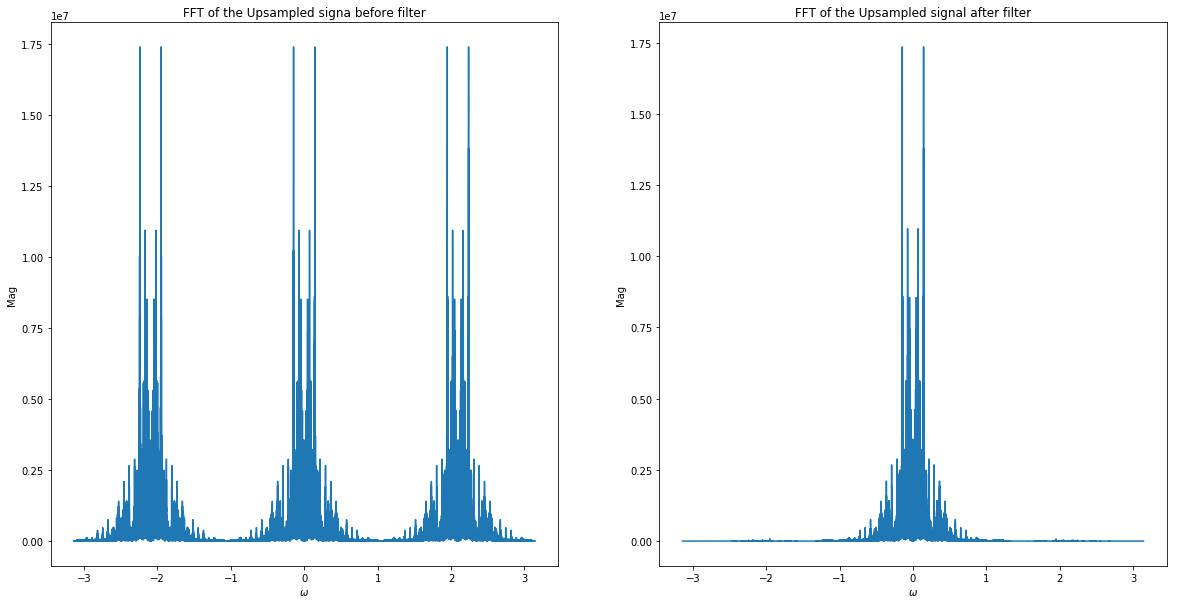

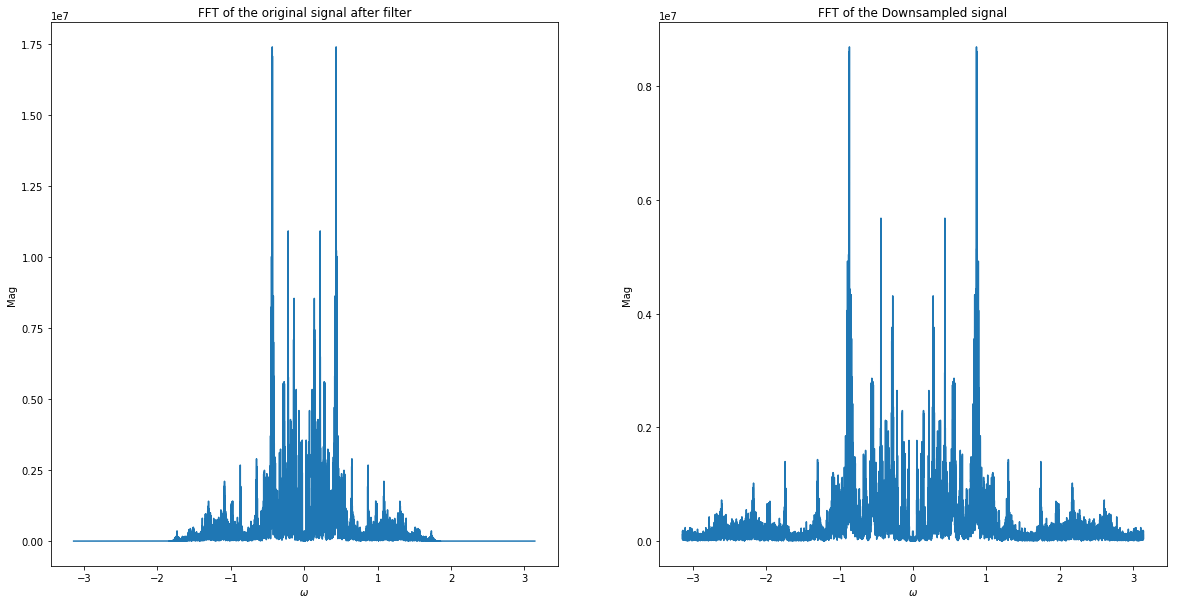

In [8]:
#Utility function for dB scaling of magnitude spectra
def sig2db(mag_spec):
    return 20*np.log10(mag_spec)
def lowpass(C):
    bands = [0,1/C,1/C+0.1,1]
    desired = [1,0]
    lpf = signal.remez(50,bands,desired,fs=2)
    return lpf

fs,original = wavfile.read('Sound_original.wav')
#Code for 6.a:
full_fft = np.fft.fft(original, 1024)
centred_fft = np.fft.fftshift(full_fft)
omega_full = np.linspace(-np.pi,np.pi,len(centred_fft)) #new frequency axis

plt.figure(figsize=(15,5))
plt.title('Full FFT')
plt.xlabel('$\omega$')
plt.ylabel('Mag')
plt.plot(omega_full,np.absolute(centred_fft))

#Code for 6.b:
def upsample (x, L):
    upsampled = np.zeros(L * len(x))
    for i in range (0, len(x)):
        upsampled[i * L] = x[i]
    return upsampled

upsampled = upsample (original, 3)

upsampled_fft = np.fft.fft(upsampled)
centred_upsampled_fft = np.fft.fftshift(upsampled_fft)
omega_upsampled_full = np.linspace(-np.pi,np.pi,len(centred_upsampled_fft)) #new frequency axis

plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.title('FFT of the Upsampled signa before filter')
plt.xlabel('$\omega$')
plt.ylabel('Mag')
plt.plot(omega_upsampled_full,np.absolute(centred_upsampled_fft))

lpf = lowpass(3)
filtered_up = signal.lfilter(lpf, 1, upsampled)
filter_fft = np.fft.fft(filtered_up)
centred_filter_fft = np.fft.fftshift(filter_fft)
omega_filter_full = np.linspace(-np.pi,np.pi,len(centred_filter_fft)) #new frequency axis

plt.subplot(122)
plt.title('FFT of the Upsampled signal after filter')
plt.xlabel('$\omega$')
plt.ylabel('Mag')
plt.plot(omega_filter_full,np.absolute(centred_filter_fft))


#Code for 6.c:
def downsample(D, x):
    downsampled = np.zeros(math.floor(len(x)/D))
    for i in range (0, len(downsampled)):
        downsampled[i] = x[i * D]
    return downsampled

lpf = lowpass(2)
filter_down = signal.lfilter(lpf, 1, original)
filter_down_fft = np.fft.fft(filter_down)
centred_filter_down_fft = np.fft.fftshift(filter_down_fft)
omega_filter_down_full = np.linspace(-np.pi,np.pi,len(centred_filter_down_fft)) #new frequency axis

plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.title('FFT of the original signal after filter')
plt.xlabel('$\omega$')
plt.ylabel('Mag')
plt.plot(omega_filter_down_full,np.absolute(centred_filter_down_fft))

downsampled = downsample (2, filter_down)

downsampled_fft = np.fft.fft(downsampled)
centred_downsampled_fft = np.fft.fftshift(downsampled_fft)
omega_downsampled_full = np.linspace(-np.pi,np.pi,len(centred_downsampled_fft)) #new frequency axis

plt.subplot(122)
plt.title('FFT of the Downsampled signal')
plt.xlabel('$\omega$')
plt.ylabel('Mag')
plt.plot(omega_downsampled_full,np.absolute(centred_downsampled_fft))

# Submission Instructions:

Please place all files in one folder, compress that folder as a zip file, and name the zip file ``netid_labfinal``. Submit your zip file to Compass like previous labs.